<a href="https://colab.research.google.com/github/ravi-prakash1907/The-Spark-Foundation-Tasks/blob/main/Task2/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**

## Libraries

In [32]:
import numpy as np
import pandas as pd
 
## for EDA
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.cluster import KMeans

## Loading the DataSet

In [33]:
localDataLoc = 'Dataset/data.csv'

## loading data
data = pd.read_csv(localDataLoc, header = 0)

## Exploratory Data Analysis

In [34]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data.shape

(150, 6)

In [36]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


_**So, there is no null value in the given dataset**_

In [43]:
## printing the unique values in 'Species' colun
## to select number of the clusters
speciesCount = len(data.Species.unique())
print("All unique ({}) species in given dataset are: \n{}".format(speciesCount, data.Species.unique()))

All unique (3) species in given dataset are: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [44]:
np.random.seed(60)
k = speciesCount ## to form 3 cluster

In [46]:
## choosing the centroide
centroids = {
    i+1 : [np.random.randint(0,8), np.random.randint(0,8)] for i in range(k)
}

centroids

{1: [0, 1], 2: [1, 2], 3: [1, 7]}

### _**Self** (without sklearn)_

(0.0, 8.0)

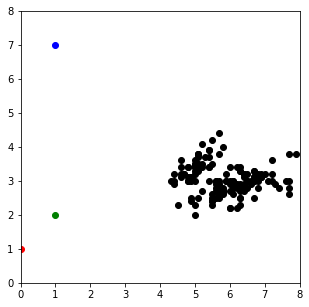

In [48]:
## visualization
fig = plt.figure(figsize=(5,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color='k')
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,8)
plt.ylim(0,8)

### **using sklearn**

In [51]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(data[])

ValueError: ignored

---

## Building the ML Model

### Data Preparation 

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
# test-train data split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

### Training on Linear Model

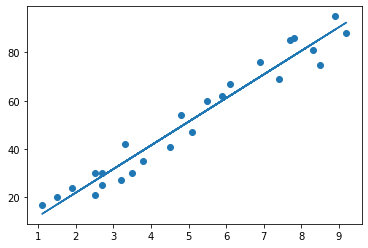

In [ ]:
## getting the model
linRegModel = LinearRegression()  

# training
linRegModel.fit(xtrain, ytrain) 


### plotting the regression line based on our training 
line = linRegModel.coef_*x+linRegModel.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Evaluation

In [ ]:
## testing the model
print("Testing Hours:\n\n",xtest)
 
# predicting the marks for test dataset
yPredicted = linRegModel.predict(xtest)
 
print("\n\nComparision:\n")
df = pd.DataFrame({'Reality': ytest, 'Prediction': yPredicted})  
 
df

Testing Hours:

 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Comparision:



,Reality,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


_**Let's check the mean absolute error**_

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, yPredicted))

Mean Absolute Error: 4.419727808027651


In [ ]:
print("Model Score: ", linRegModel.score(xtest, ytest))

Model Score:  0.9568211104435257


## Prediction

In [ ]:
def predictMarks(hour = None):
  if hour is None:
    hour = round(randint(4,11))
  
  hour = np.array(hour)
  marks = linRegModel.predict(hour.reshape(-1, 1))

  print("Hours = {} \t|\t Marks = {}".format(hour, marks[0]))

In [ ]:
# a random prediction
predictMarks()

Hours = 10 	|	 Marks = 100.25648224983233


### **Prediction for the User Data**

In [ ]:
hours = float(input("Enter the hours (float): "))
 
print("\nPrediction: \n")
predictMarks(hours)

Enter the hours (float): 10.0

Prediction: 

Hours = 10.0 	|	 Marks = 100.25648224983233
